In [60]:
#Import packages
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Generate a list of colors based on the "bright" color scheme
colors = sns.color_palette('bright', n_colors=12)

In [89]:
df = pd.read_csv('DateTimeCleanedReservationsAll.csv')
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,1/6/13 9:00,1/6/13 12:30,210,6,1,2013,9.0
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,1/6/13 17:00,1/6/13 23:00,360,6,1,2013,17.0
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/7/13 17:30,1/7/13 18:25,55,0,1,2013,17.5
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 17:30,1/9/13 18:25,55,2,1,2013,17.5
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 19:00,1/9/13 20:15,75,2,1,2013,19.0


In [84]:
sns.relplot(data=df, x="Duration Minutes", y="Facility Class")
plt.savefig("relplot.pdf", format="pdf", bbox_inches="tight")

In [90]:
cols = ['Facility Class', 'Facility Location', 'Facility Code', 'Facility', 'Status', 'Reservation Type']
df[cols] = df[cols].apply(lambda x: pd.factorize(x)[0])

In [92]:
plt.close()
sns.heatmap(df.corr()[["Duration Minutes"]].sort_values(by="Duration Minutes"), linewidths=1,annot=True)
plt.savefig("MinutesCorrelation.pdf", format="pdf", bbox_inches="tight")

In [81]:
df['Size'] = df['Facility Class'].apply(lambda x: "Entire Facility" if x == "BDEF" else ("Field" if x == "BDTRF" else "Single Room"))

In [83]:
my_order = df.groupby(by=["Size"])["Duration Minutes"].median().index
sns.boxplot(data=df, x='Size', y='Duration Minutes', order=my_order)
plt.yscale("log")
plt.savefig("MinutesBoxPlot.pdf", format="pdf", bbox_inches="tight")

In [85]:
my_order = df.groupby(by=["Facility Location"])["Duration Minutes"].median().index
sns.boxplot(data=df, x='Facility Location', y='Duration Minutes', order = my_order)
plt.yscale("log")
plt.savefig("MinutesBoxPlot2.pdf", format="pdf", bbox_inches="tight")

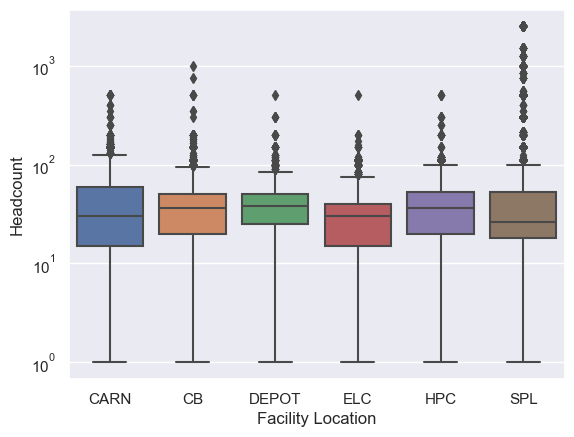

In [58]:
my_order = df.groupby(by=["Facility Location"])["Headcount"].median().index
sns.boxplot(data=df, x='Facility Location', y='Headcount', order = my_order)
plt.yscale("log")
plt.show()